**Connect google drive**

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 123
 1571755258087.jpg
'400020353407 (1).pdf'
 400020353407.pdf
'Colab Notebooks'
 Demat_PaytmMoney.pdf
'Document from Manish Kumar'
'DSR- Manish Kr - Sept 21,22 & 23.xlsx'
 goibibo_ranchi_delhi_dehradun.pdf
'Google Photos'
 HDFC_Life_Sanchay_Par_Advantage_Retail_Brochure.pdf
'https:  gl4l.gr.txt'
'https:  in.000webhost.com.gsheet'
 invoice_5775757826.pdf
 jtsboard_jts_db.sql
 Manish_krcv.pdf
 Manish-kr-cv-.pdf
'Manish Kumar resume 2021.pdf'
 Parent_AFD_6288216_3820171509777.pdf
 PMNPS202000018128.pdf
 Print_Boarding_pass_PNR_PCK2WJ_06_Mar_2021_Delhi_to_Dehradun_for_MANISHKUMAR.pdf
 Print_Boarding_pass_PNR_PCK2WJ_06_Mar_2021_Ranchi_to_Delhi_for_MANISH.pdf
'Purdue AI and ML Dual Master Program_v4.pdf'
 sales_jts1.csv
 service_price.csv
'softweb dsr'
 SpiceJet_BaggageLabel_PCK2WJ_06_Mar_2021_Ranchi_Delhi_for_MANISHKUMAR.pdf
'SpiceJet_E-ticket_PNR PCK2WJ - 06 Mar 2021 Ranchi-Delhi for MR. KUMAR.PDF'
'Student_AFD_6288216_3820171509669 (1).pdf'
 Student_AFD_62882

In [1]:
!git clone https://github.com/manishzed/Yolov3-custom-object-detection.git

Cloning into 'Yolov3-custom-object-detection'...
remote: Enumerating objects: 74, done.
remote: Total 74 (delta 0), reused 0 (delta 0), pack-reused 74
Unpacking objects: 100% (74/74), done.


**1) Clone the Darknet**



In [2]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15494, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15494 (delta 0), reused 2 (delta 0), pack-reused 15490
Receiving objects: 100% (15494/15494), 14.09 MiB | 1.89 MiB/s, done.
Resolving deltas: 100% (10411/10411), done.


**2) Compile Darknet using Nvidia GPU**


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

**3) Configure Darknet network for training YOLO V3**

In [5]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [6]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [7]:
# Create folder on google drive so that we can save there the weights
!mkdir "/content/yolov3"

In [8]:
!echo "pot" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /content/yolov3' > data/obj.data
!mkdir data/obj

In [9]:
!ls /content/yolov3/

In [10]:

!cp cfg/yolov3_training.cfg /content/yolov3/yolov3_testing.cfg
!cp data/obj.names /content/yolov3/classes.txt

In [11]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-10-11 12:02:14--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   102MB/s    in 1.5s    

2022-10-11 12:02:16 (102 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [12]:
!unzip /content/Yolov3-custom-object-detection/images.zip -d data/obj

Archive:  /content/Yolov3-custom-object-detection/images.zip
  inflating: data/obj/pot6.jpg       
  inflating: data/obj/pot6.txt       
  inflating: data/obj/pot7.jpg       
  inflating: data/obj/pot7.txt       
  inflating: data/obj/pot8.jpg       
  inflating: data/obj/pot8.txt       
  inflating: data/obj/pot9.jpg       
  inflating: data/obj/pot9.txt       
  inflating: data/obj/pot10.jpg      
  inflating: data/obj/pot10.txt      
  inflating: data/obj/pot0.jpg       
  inflating: data/obj/pot0.txt       
  inflating: data/obj/pot1.jpg       
  inflating: data/obj/pot1.txt       
  inflating: data/obj/pot2.jpg       
  inflating: data/obj/pot2.txt       
  inflating: data/obj/pot3.jpg       
  inflating: data/obj/pot3.txt       
  inflating: data/obj/pot4.jpg       
  inflating: data/obj/pot4.txt       
  inflating: data/obj/pot5.jpg       
  inflating: data/obj/pot5.txt       


**6) Start the training**

In [14]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(images_list)


['data/obj/pot4.jpg', 'data/obj/pot3.jpg', 'data/obj/pot1.jpg', 'data/obj/pot6.jpg', 'data/obj/pot2.jpg', 'data/obj/pot9.jpg', 'data/obj/pot7.jpg', 'data/obj/pot8.jpg', 'data/obj/pot5.jpg', 'data/obj/pot10.jpg', 'data/obj/pot0.jpg']


In [15]:
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.597882), count: 16, class_loss = 2.245492, iou_loss = 2.679028, total_loss = 4.924519 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.615584), count: 5, class_loss = 1.259185, iou_loss = 0.848613, total_loss = 2.107799 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000663, iou_loss = 0.000000, total_loss = 0.000663 
 total_bbox = 147335, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.591621), count: 9, class_loss = 1.370835, iou_loss = 1.420687, total_loss = 2.791522 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.587303), count: 10, class_loss = 1.668527, iou_loss = 1.777594, total_loss = 3.446121 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1

In [ ]:
#testing
!ls "data/obj.data"

data/obj.data


In [ ]:
#prediction and testing

In [ ]:
!cp "/content/darknet" -r "/content/gdrive/MyDrive/yolov3"


In [ ]:
#!./darknet detector test "data/obj.data" "cfg/yolov3_training.cfg" "/content/gdrive/MyDrive/yolov3/yolov3_training_last.weights" '/content/gdrive/MyDrive/yolov3/pot0.jpg'

In [ ]:
!ls '/content/gdrive/MyDrive/yolov3'

classes.txt  pot10.jpg	pot5.jpg  yolov3_testing.cfg
images.zip   pot1.jpg	pot6.jpg  yolov3_training_1000.weights
obj.data     pot2.jpg	pot7.jpg  yolov3_training_last.weights
output	     pot3.jpg	pot8.jpg
pot0.jpg     pot4.jpg	pot9.jpg


[[0]
 [1]]
no. of bounding boxes 2


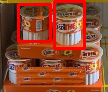

In [ ]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow

weights ='/content/gdrive/MyDrive/yolov3/yolov3_training_1000.weights'
cfg = '/content/gdrive/MyDrive/yolov3/yolov3_testing.cfg'
#dataset ='/content/gdrive/MyDrive/yolov3/pot0.jpg'
# Load Yolo
net = cv2.dnn.readNet(weights, cfg)

# Name custom object
classes = ["pot"]

# Images path
img_path = '/content/gdrive/MyDrive/yolov3/pot10.jpg'


layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
#colors = np.random.uniform(0, 255, size=(len(classes), 3))


img = cv2.imread(img_path)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
            # Object detected
            #print(class_id)
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
        #cv2.putText(img, label, (x, y + 30), font, 3, color, 1)

print("no. of bounding boxes",len(indexes))
cv2.imwrite("/content/gdrive/MyDrive/yolov3/output/pot10.jpg", img)
cv2_imshow(img)


In [ ]:
indexes

array([[2],
       [4],
       [8],
       [7],
       [5],
       [3],
       [1],
       [0],
       [6]], dtype=int32)

In [ ]:
!pwd

/content/darknet
